In [ ]:
2# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Parametros generales
n_samples = 10000
grid_size = 1500

In [ ]:
# Generamos datasets de prueba
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, centers=2)
no_structure = np.random.rand(n_samples, 2)

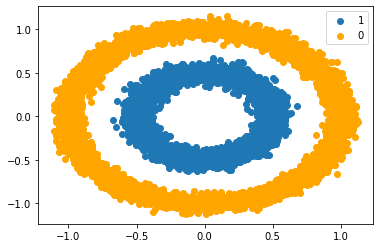

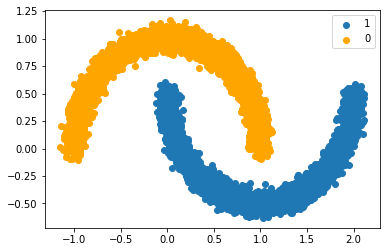

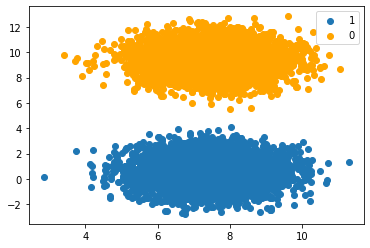

In [ ]:
# Visualizacion de los datasets
for dset in [noisy_circles, noisy_moons, blobs]:
  X, y = dset[0], dset[1]
  plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
  plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
  plt.legend()
  plt.show()

# Perceptron

![perceptron](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/400px-Perceptr%C3%B3n_5_unidades.svg.png)

In [ ]:
X, y = noisy_moons

In [ ]:
X.shape, y.shape

((10000, 2), (10000,))

In [ ]:
h0_size = 1 # perceptron = 1 neurona
w0 = np.random.random(size=(X.shape[1], h0_size)) # pesos

In [ ]:
def activation_function(x):
  # sigmoid function
  return 1 / (1 + np.exp(-x))

In [ ]:
# Acabamos de crear una red de tipo perceptron! ahora vamos a entrenarla

In [ ]:
def activation_function_gradient(x):
  return x * (1 - x)

In [ ]:
def error(X, w, y, threshold=0.5):
  predictions = activation_function(X @ w)
  # predictions_binary = predictions > threshold
  error = ((y.reshape(y.shape[0], 1) - predictions)**2).sum()
  return error

In [ ]:
def train_perceptron(X, y, w, epochs):
  for _ in range(epochs):
    for i, x in enumerate(X):
      z = x.T @ w
      output = activation_function(z)
      
      output_error = y[i] - output
      output_delta = output_error * activation_function_gradient(output)

      # update
      w += (x.reshape(x.shape[0],1) @ output_delta).reshape(w.shape[0], w.shape[1])
    print(f"Epoch {_} --- loss {error(X, w, y)}")
  return w

In [ ]:
w1 = train_perceptron(X, y, w0, 100)

Epoch 0 --- loss 2531.8532923015728
Epoch 1 --- loss 2531.8532923015728
Epoch 2 --- loss 2531.8532923015728
Epoch 3 --- loss 2531.8532923015728
Epoch 4 --- loss 2531.8532923015728
Epoch 5 --- loss 2531.8532923015728
Epoch 6 --- loss 2531.8532923015728
Epoch 7 --- loss 2531.8532923015728
Epoch 8 --- loss 2531.8532923015728
Epoch 9 --- loss 2531.8532923015728
Epoch 10 --- loss 2531.8532923015728
Epoch 11 --- loss 2531.8532923015728
Epoch 12 --- loss 2531.8532923015728
Epoch 13 --- loss 2531.8532923015728
Epoch 14 --- loss 2531.8532923015728
Epoch 15 --- loss 2531.8532923015728
Epoch 16 --- loss 2531.8532923015728
Epoch 17 --- loss 2531.8532923015728
Epoch 18 --- loss 2531.8532923015728
Epoch 19 --- loss 2531.8532923015728
Epoch 20 --- loss 2531.8532923015728
Epoch 21 --- loss 2531.8532923015728
Epoch 22 --- loss 2531.8532923015728
Epoch 23 --- loss 2531.8532923015728
Epoch 24 --- loss 2531.8532923015728
Epoch 25 --- loss 2531.8532923015728
Epoch 26 --- loss 2531.8532923015728
Epoch 27 --

In [ ]:
error(X, w1, y)

2531.8532923015728

In [ ]:
x1_range = np.linspace(X[:,0].min(), X[:,0].max(), grid_size)
x2_range = np.linspace(X[:,1].min(), X[:,1].max(), grid_size)

In [ ]:
x1_range, x2_range

(array([-1.10865061, -1.10716003, -1.10566945, ...,  1.12274765,
         1.12423823,  1.12572881]),
 array([-1.12225064, -1.12073348, -1.11921633, ...,  1.14892754,
         1.15044469,  1.15196185]))

In [ ]:
x1_, x2_ = np.meshgrid(x1_range, x2_range)

In [ ]:
stacked_grid = np.dstack((x1_,x2_))
y_grid = [activation_function(x_grid @ w1) for x_grid in stacked_grid]

In [ ]:
y_grid = np.array(y_grid).reshape(grid_size, grid_size)

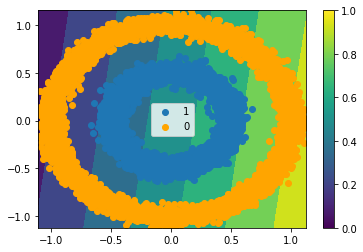

In [ ]:
plt.contourf(x1_range, x2_range, y_grid)
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
plt.colorbar()
plt.legend()
plt.show()

MultiLayer Perceptron

![mlp](https://www.researchgate.net/profile/Allan-Kardec-Barros-Filho/publication/274240858/figure/fig1/AS:392021136166914@1470476530215/TOPOLOGY-OF-A-MULTILAYER-PERCEPTRON-NEURAL-NETWORK.png)

In [ ]:
def nn_forward(X, weights, act_fnc):
  z0 = act_fnc(X @ weights[0]) # C.Entrada -> 1ra C.Oculta
  z_i = z0
  for w in weights[1:]:
    z_i = act_fnc(z_i @ w)
  return z_i

In [ ]:
def error_mlp(X, w0, w1, w2, y, threshold=0.5):
  # Forward pass 
  z0 = activation_function(X @ w0) # C.Entrada -> 1ra C.Oculta
  # (n_obs, h0_size)
  z1 = activation_function(z0 @ w1) # 1ra C.Oculta -> 2da. C.Oculta
  # (h0_size, h1_size)
  predictions = activation_function(z1 @ w2) # 2da C.Oculta -> C.Salida
  # (n_obs, output_size)
  # predictions_binary = predictions > threshold
  error = ((y.reshape(y.shape[0], 1) - predictions)**2).sum() # mean squared error
  return error

In [ ]:
def train_mlp(X, y, w0, w1, w2, epochs):
  for _ in range(epochs):
    for i, x in enumerate(X):
      # Forward pass 
      z0 = activation_function(x.T @ w0) # C.Entrada -> 1ra C.Oculta
      # (n_obs, h0_size)
      z1 = activation_function(z0 @ w1) # 1ra C.Oculta -> 2da. C.Oculta
      # (h0_size, h1_size)
      output = activation_function(z1 @ w2) # 2da C.Oculta -> C.Salida
      # (n_obs, output_size)
      
      # Backpropagation 
      output_error = y[i] - output # (n_obs, output_size)
      output_delta = output_error * activation_function_gradient(output)

      # output_delta --> (n_obs, output_size)
      # w2 --> (h1_size, output_size).T --> (output_size, h1_size)
      z1_error = output_delta @ w2.T
      z1_delta = z1_error * activation_function_gradient(z1)

      z0_error = z1_delta @ w1.T
      z0_delta = z0_error * activation_function_gradient(z0)

      # Gradient Step (weights update)

      # z1 -> (n_obs, h1_size).T --> (h1_size, n_obs)
      # output_delta -> (n_obs, output_size)
      # w2 -> (h1_size, output_size)
      w2 += z1.reshape((1,-1)).T @ output_delta.reshape((1,-1))
      
      # z0 -> (n_obs, h0_size).T --> (h0_size, n_obs)
      # z1_delta -> (n_obs, h1_size)
      # w1 -> (h0_size, h1_size)
      w1 += z0.reshape((1,-1)).T @ z1_delta.reshape((1,-1))

      # x -> (n_obs, input_size).T --> (input_size, n_obs)
      # z0_delta -> (n_obs, h0_size)
      # w0 -> (input_size, h0_size)
      w0 += x.reshape((1,-1)).T @ z0_delta.reshape((1,-1))
    print(f"Epoch {_} --- loss {error_mlp(X, w0, w1, w2, y)}")

In [ ]:
h0_size = 3 
h1_size = 2 
output_size = 1

# pesos
w0 = np.random.random(size=(X.shape[1], h0_size))
w1 = np.random.random(size=(h0_size, h1_size)) 
w2 = np.random.random(size=(h1_size, output_size))

In [ ]:
train_mlp(X, y, w0, w1, w2, epochs=100)

Epoch 0 --- loss 2502.0717537011715
Epoch 1 --- loss 2046.7689643582914
Epoch 2 --- loss 2001.8926700841769
Epoch 3 --- loss 1989.4039837711389
Epoch 4 --- loss 1984.1066015787615
Epoch 5 --- loss 1981.017319521908
Epoch 6 --- loss 1979.0445389688352
Epoch 7 --- loss 1977.56319311444
Epoch 8 --- loss 1976.3949612908843
Epoch 9 --- loss 1975.3398193638627
Epoch 10 --- loss 1972.836663839324
Epoch 11 --- loss 1961.4211020461853
Epoch 12 --- loss 1959.8238545147967
Epoch 13 --- loss 1959.0844863812506
Epoch 14 --- loss 1958.4367738798724
Epoch 15 --- loss 1957.7451419191448
Epoch 16 --- loss 1956.9701731552686
Epoch 17 --- loss 1956.2186017487938
Epoch 18 --- loss 1955.4715736859403
Epoch 19 --- loss 1954.5381185341096
Epoch 20 --- loss 1953.4076343148615
Epoch 21 --- loss 1952.1239924936099
Epoch 22 --- loss 1950.7232198366644
Epoch 23 --- loss 1949.306687780205
Epoch 24 --- loss 1948.0045011645298
Epoch 25 --- loss 1946.8859120687014
Epoch 26 --- loss 1945.968684138118
Epoch 27 --- loss

In [ ]:
def plot_decision_rule(X, y, weights, act_fnc, grid_size=1000):
  # Create meshgrid
  x1_range = np.linspace(X[:,0].min(), X[:,0].max(), grid_size) # -> (grid_size, )
  x2_range = np.linspace(X[:,1].min(), X[:,1].max(), grid_size) # -> (grid_size, )
  x1_, x2_ = np.meshgrid(x1_range, x2_range) # x1_ or x_2 -> (grid_size, grid_size)
  stacked_grid = np.dstack((x1_,x2_)) # 3D structure (grid_size, grid_size, 2)
  
  # Calculate nn output
  # x_grid -> (grid_size, 2)
  y_grid = np.array([nn_forward(x_grid, weights, act_fnc) for x_grid in stacked_grid]) # -> (grid_size**2, )
  y_grid = y_grid.reshape(grid_size, grid_size) # -> (grid_size, grid_size)

  # Make plot
  plt.contourf(x1_range, x2_range, y_grid)
  plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
  plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
  plt.colorbar()
  plt.legend()
  plt.show()

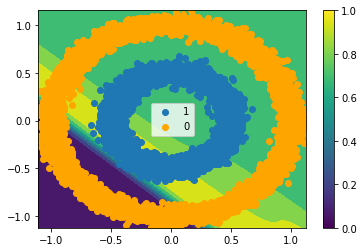

In [ ]:
plot_decision_rule(X, y, [w0, w1, w2], activation_function, grid_size)

## Implementar NN como clase de python

In [ ]:
class MLP:

  def __init__(self, input_size: int, layers_sizes: list, act_fnc, act_fnc_grad, output_size: int):
    self.input_size = input_size 
    self.layers_sizes = layers_sizes 
    self.act_fnc = act_fnc 
    self.act_fnc_grad = act_fnc_grad
    self.output_size = output_size
    
    # Inicializar los pesos
    self.n_layers = len(self.layers_sizes)
    self.layers_weights = [np.random.random(size=(self.input_size, self.layers_sizes[0]))] + \
    [np.random.random(size=(self.layers_sizes[i], self.layers_sizes[i+1])) for i in range(self.n_layers-1)] + \
    [np.random.random(size=(self.layers_sizes[-1], self.output_size))]

  def forward(self, X, return_outputs=False):
    z = X # input data
    outputs = []
    for w in self.layers_weights:
      z = self.act_fnc(z @ w)
      outputs.append(z)
    
    if return_outputs:
      return outputs
    else:
      return z

  def loss(self, y, y_hat):
    # squared error
    return (y.flatten() - y_hat.flatten())**2

  def train(self, X, y, epochs, batch_size=32, lr=1e-4):
    # Backpropagation algorithm + Gradient Descent
    for epoch in range(epochs):
      for ix in range(batch_size, X.shape[0], batch_size):
        x = X[ix:ix+batch_size] # (batch_size, n_features)
        target = y[ix:ix+batch_size].reshape(-1, self.output_size) # (batch_size, output_size)

        # Paso 1: Forward pass 
        outputs = self.forward(x, return_outputs=True)

        # Paso 2: Backward error propagation
        for j in range(1, len(self.layers_weights)+1):
          # Hint: Se usa -j para ir de "adelante hacia atras"
          
          # Paso 2.1: Calculo del error
          if j == 1:
            z_error = target - outputs[-j] # Capa de salida
          else:
            z_error = z_delta @ self.layers_weights[-(j-1)].T

          # Paso 2.2: Calculo de la gradiente del error
          z_delta = z_error * self.act_fnc_grad(outputs[-j])
          
          # Paso 2.3: Ajuste de pesos proporcionalemente al error
          if j == len(self.layers_weights):
            self.layers_weights[-j] += x.T @ z_delta # Capa de entrada
          else:
            self.layers_weights[-j] += (outputs[-(j+1)].T @ z_delta) * lr
      
      epoch_loss = self.loss(y, self.forward(X)).mean() # Mean Squared Error (mse)
      if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} --- loss {epoch_loss}")
    
  def plot_decision_rule(self, X, y, grid_size=1000):
    # Create meshgrid
    x1_range = np.linspace(X[:,0].min(), X[:,0].max(), grid_size) # -> (grid_size, )
    x2_range = np.linspace(X[:,1].min(), X[:,1].max(), grid_size) # -> (grid_size, )
    x1_, x2_ = np.meshgrid(x1_range, x2_range) # x1_ or x_2 -> (grid_size, grid_size)
    stacked_grid = np.dstack((x1_,x2_)) # 3D structure (grid_size, grid_size, 2)
  
    # Calculate nn output
    # x_grid -> (grid_size, 2)
    y_grid = np.array([self.forward(x_grid) for x_grid in stacked_grid]) # -> (grid_size**2, )
    y_grid = y_grid.reshape(grid_size, grid_size) # -> (grid_size, grid_size)

    # Make plot
    plt.contourf(x1_range, x2_range, y_grid)
    plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
    plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
    plt.colorbar()
    plt.legend(loc='upper right')
    plt.show()


In [ ]:
X, y = noisy_circles

In [ ]:
nn = MLP(
    input_size=X.shape[1], 
    layers_sizes=[6, 3], 
    act_fnc=activation_function, 
    act_fnc_grad=activation_function_gradient,
    output_size=1 # Binary classification
  )

In [ ]:
X.shape, y.shape

((10000, 2), (10000,))

In [ ]:
prediction = nn.forward(X)
prediction.shape

(10000, 1)

In [ ]:
error = nn.loss(y, prediction)
error.mean() # Error con los pesos aleatorios (antes del entrenamiento)

0.3558574749230258

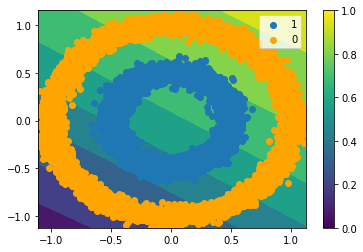

In [ ]:
nn.plot_decision_rule(X, y)

In [ ]:
nn.train(X, y, epochs=400, batch_size=32, lr=0.1)

Epoch 100/400 --- loss 0.08345459139911245
Epoch 200/400 --- loss 0.08937305000136198
Epoch 300/400 --- loss 0.05044793121906508
Epoch 400/400 --- loss 0.045839788654012156


In [ ]:
prediction_trained = nn.forward(X)

In [ ]:
error_train = nn.loss(y, prediction_trained)
error_train.mean()

0.045839788654012156

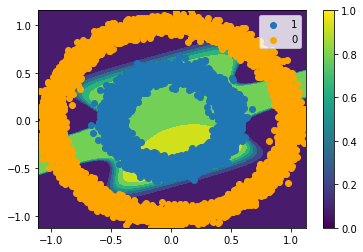

In [ ]:
nn.plot_decision_rule(X, y)

In [ ]:
# Generamos datasets de prueba
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, centers=2)
no_structure = np.random.rand(n_samples, 2)

Error ANTES de Entrenar: 0.3636821059454047
Datos y Salida de la Red ANTES de Entrenar


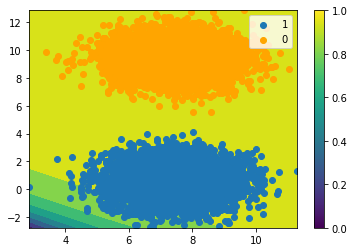

Comienza el entrenamiento:
Epoch 100/400 --- loss 1.554371414569696e-05
Epoch 200/400 --- loss 7.759253222875922e-06
Epoch 300/400 --- loss 5.16395990813294e-06
Epoch 400/400 --- loss 3.86748369071018e-06

Error DESPUES de Entrenar: 3.86748369071018e-06
Datos y Salida de la Red DESPUES de Entrenar


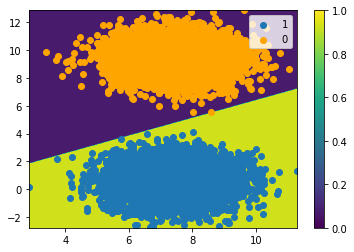

Error ANTES de Entrenar: 0.3560227908328098
Datos y Salida de la Red ANTES de Entrenar


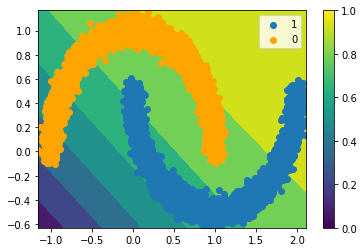

Comienza el entrenamiento:
Epoch 100/400 --- loss 0.0005048702195263292
Epoch 200/400 --- loss 5.860328392216199e-05
Epoch 300/400 --- loss 3.5969409339822455e-05
Epoch 400/400 --- loss 2.6561559310155026e-05

Error DESPUES de Entrenar: 2.6561559310155026e-05
Datos y Salida de la Red DESPUES de Entrenar


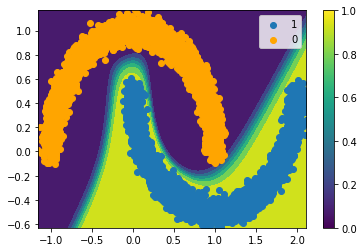

Error ANTES de Entrenar: 0.39087914252235145
Datos y Salida de la Red ANTES de Entrenar


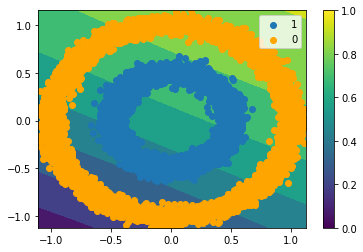

Comienza el entrenamiento:
Epoch 100/400 --- loss 0.00671226255269226
Epoch 200/400 --- loss 0.005908694052852563
Epoch 300/400 --- loss 0.2518758909225678
Epoch 400/400 --- loss 0.0006331485280988359

Error DESPUES de Entrenar: 0.0006331485280988359
Datos y Salida de la Red DESPUES de Entrenar


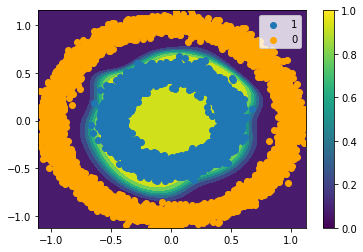

In [ ]:
for dset in [blobs, noisy_moons, noisy_circles]:
  X, y = dset[0], dset[1]

  nn = MLP(input_size=X.shape[1], layers_sizes=[6, 3],
           act_fnc=activation_function, act_fnc_grad=activation_function_gradient,
           output_size=1)
  
  print('Error ANTES de Entrenar:', nn.loss(y, nn.forward(X)).mean())
  print('Datos y Salida de la Red ANTES de Entrenar')
  nn.plot_decision_rule(X, y)

  print('Comienza el entrenamiento:')
  nn.train(X, y, epochs=400, batch_size=32, lr=0.1)
  print()

  print('Error DESPUES de Entrenar:', nn.loss(y, nn.forward(X)).mean())
  print('Datos y Salida de la Red DESPUES de Entrenar')
  nn.plot_decision_rule(X, y)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(X.shape[1],)), # 1ra Capa oculta + entrada
  # w0 = 2x10
  # Capas ocultas ( 1 o muchas )
  tf.keras.layers.Dense(15, activation='relu'), # w1 = 10x15
  # ...
  # Capa de salida
  tf.keras.layers.Dense(1, activation='sigmoid') # w2 = 15x1
])

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=15, validation_split=0.1)

Epoch 1/15
43/43 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/15
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/15
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/15
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/15
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/15
43/43 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss

In [ ]:
from tqdm import tqdm

In [ ]:
y_grid_complex = []
for x_grid in tqdm(stacked_grid):
  y_grid_complex.append(model.predict(x_grid))

100%|██████████| 1500/1500 [02:47<00:00,  8.93it/s]


In [ ]:
y_grid_complex[0].shape, len(y_grid_complex)

((1500, 1), 1500)

In [ ]:
y_grid_complex_ = np.array(y_grid_complex).reshape(n_samples, n_samples)

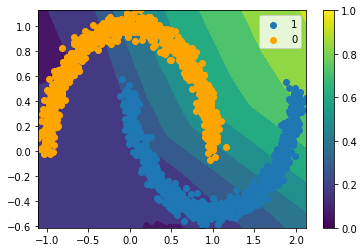

In [ ]:
plt.contourf(x1_range, x2_range, y_grid_complex_)
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
plt.colorbar()
plt.legend()
plt.show()